In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import webbrowser
import os

In [66]:
# nltk.download()

In [67]:
df = pd.read_csv('Play Store Data.csv')

In [68]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [69]:
df.shape

(10841, 13)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data cleaning of Playstore

In [71]:
df.duplicated().sum()

483

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df.shape

(10358, 13)

In [74]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Removing all the null value from all column.

In [75]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0],inplace=True)

C:\Users\rajv6\AppData\Local\Temp\ipykernel_7036\651398187.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [76]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [77]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [78]:
df['Price'] = df['Price'].replace('Everyone',0)

In [79]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 0, '$1.20', '$1.04'], dtype=object)

In [80]:
# There is $ sign in the price we have to replace and change the datatype
df['Price'] = df["Price"].str.replace("$",'')
df['Price'] = df['Price'].astype(float)

In [81]:
df['Installs'].mode()

0    1,000,000+
Name: Installs, dtype: object

In [82]:
print(df['Installs'].isna().sum())

0


In [83]:
df['Installs'] = df['Installs'].fillna(0)

In [84]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [85]:
df['Installs'] = df['Installs'].replace("Free","1,000,000+")

In [86]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [87]:
# There is + , sign in the Installs we have to replace and change the datatype str to int
df['Installs'] = df["Installs"].str.replace("+","").str.replace(",","")

In [88]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [89]:
df['Installs'] = df['Installs'].astype(int)

In [90]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [91]:
df['Rating'].max()

19.0

In [92]:
df[df.Rating==19.0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",1000000,0,NaN,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [93]:
df['Rating'].describe()

count    10358.000000
mean         4.219309
std          0.510698
min          1.000000
25%          4.100000
50%          4.400000
75%          4.500000
max         19.000000
Name: Rating, dtype: float64

<Axes: ylabel='Rating'>

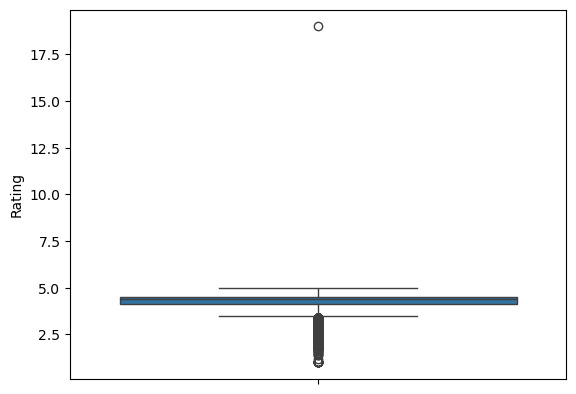

In [94]:
sns.boxplot(df['Rating'])

In [95]:
print(df['Rating'].mode())
df['Rating'] = df['Rating'].replace(19.0,4.4)

0    4.4
Name: Rating, dtype: float64


In [96]:
df= df[df['Rating']<=5]

# Data cleaning of User

In [97]:
user = pd.read_csv('User Reviews.csv')

In [98]:
user.shape

(64295, 5)

In [99]:
user.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32210,DINO HUNTER: DEADLY SHORES,"Awesome game!! Infatuated it. I play day long,...",Positive,0.225000,0.55
64171,Hotwire Hotel & Car Rental App,Great,Positive,0.800000,0.75
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.30
39832,"Emoji keyboard - Cute Emoticons, GIF, Stickers",NaN,NaN,NaN,NaN
5048,Airbnb,"Why offer rewards users, allow users post actu...",Negative,-0.166667,0.55


In [100]:
print(user.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [101]:
user.dropna(subset=['Translated_Review'],inplace=True)

In [102]:
print(user.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [103]:
user.shape

(37427, 5)

# Merge data 

In [104]:
data = pd.merge(df,user,on='App',how='inner')

In [105]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [106]:
print(data.isnull().sum())

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [107]:
print(data.duplicated().sum())

18749


In [108]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace("M",""))
    elif 'K' in size:
        return float(size.replace('K',''))/1024
    else:
        return 'nan'

data['Size'] = data['Size'].apply(convert_size) 

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59163 entries, 0 to 59162
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     59163 non-null  object 
 1   Category                59163 non-null  object 
 2   Rating                  59163 non-null  float64
 3   Reviews                 59163 non-null  object 
 4   Size                    59163 non-null  object 
 5   Installs                59163 non-null  int32  
 6   Type                    59163 non-null  object 
 7   Price                   59163 non-null  float64
 8   Content Rating          59163 non-null  object 
 9   Genres                  59163 non-null  object 
 10  Last Updated            59163 non-null  object 
 11  Current Ver             59163 non-null  object 
 12  Android Ver             59163 non-null  object 
 13  Translated_Review       59163 non-null  object 
 14  Sentiment               59163 non-null

In [110]:
data['Reviews'] = data['Reviews'].astype(int)

In [111]:
data['Log_Installs'] = np.log(data['Installs'])
data['Log_Reviews'] = np.log(data['Reviews'])

In [112]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Log_Installs,Log_Reviews
1498,Golden Dictionary (EN-AR),BOOKS_AND_REFERENCE,4.4,51269,6.1,1000000,Free,0.00,Everyone,Books & Reference,"July 19, 2018",7.0.4.6,4.2 and up,wow,Positive,0.10,1.000000,13.815511,10.844842
4237,BBW Dating & Plus Size Chat,DATING,4.4,12632,29.0,1000000,Free,0.00,Mature 17+,Dating,"July 27, 2018",3.5.0.1,4.1 and up,Not paying message someone see liked me.,Positive,0.60,0.800000,13.815511,9.443989
32140,DisneyNOW – TV Shows & Games,FAMILY,4.3,82471,nan,5000000,Free,0.00,Everyone,Entertainment;Music & Video,"July 5, 2018",Varies with device,4.4 and up,It's nice kids want watch show demand cable. H...,Positive,0.05,0.775000,15.424948,11.320202
57409,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3397,9.5,50000,Paid,3.99,Everyone,Casual;Pretend Play,"December 9, 2014",1.8,4.0 and up,No content In this simulation the children do ...,Neutral,0.00,0.000000,10.819778,8.130648
8981,Colorfy: Coloring Book for Adults - Free,ENTERTAINMENT,4.5,787177,nan,10000000,Free,0.00,Everyone,Entertainment,"June 20, 2018",Varies with device,Varies with device,This really good game! It helps calm forget ba...,Negative,-0.04,0.503333,16.118096,13.576208


In [113]:
def rating_group(rate):
    if rate >=4:
        return "Top rated app"
    elif rate >=3:
        return "Above Average"
    elif rate >=2:
        return "Average"
    else:
        return "Blow Average"
data['Rating Group'] = data['Rating'].apply(rating_group)

In [114]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Log_Installs,Log_Reviews,Rating Group
58257,Google News,NEWS_AND_MAGAZINES,3.9,878065,13.0,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,Best news yet. The stories relevant interests ...,Positive,0.633333,0.600000,20.723266,13.685476,Above Average
46258,Adobe Acrobat Reader,PRODUCTIVITY,4.3,3016305,nan,100000000,Free,0.0,Everyone,Productivity,"April 17, 2018",Varies with device,Varies with device,Forces account password means Google knowledge...,Negative,-0.275000,0.566667,18.420681,14.919543,Top rated app
15507,H&M,LIFESTYLE,3.7,41941,14.0,10000000,Free,0.0,Everyone,Lifestyle,"July 30, 2018",9.6.3,4.4 and up,I wish I update !!!! I loved old better thinki...,Positive,0.201732,0.381169,16.118096,10.644019,Above Average
46797,Dropbox,PRODUCTIVITY,4.4,1861309,61.0,500000000,Free,0.0,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device,It suck much data space does.,Positive,0.200000,0.200000,20.030119,14.436791,Top rated app
16267,Bubble Shooter,GAME,4.5,148897,46.0,10000000,Free,0.0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up,My free work time never uploads new video plz ...,Positive,0.245455,0.484848,16.118096,11.911010,Top rated app


In [115]:
# Makeing new column Revenue
data["Revenue"]  = data['Price']*data['Installs']

In [116]:
print(data['Revenue'].max())
print(data['Price'].max())

2490000.0
29.99


In [117]:
data.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Log_Installs,Log_Reviews,Rating Group,Revenue
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,13.122363,6.874198,Above Average,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,13.122363,6.874198,Above Average,0.0
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,13.122363,6.874198,Above Average,0.0
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,13.122363,6.874198,Above Average,0.0


# Sentiment Analysis

In [118]:
sai = SentimentIntensityAnalyzer()

## Polarity score in Sentiment Intensity Analyzer.
### - Positive , Negative, Neutral and Compound .
### - Value of Compound close to -1 then it is very negative .
### - Value of Compound close to +1 then it is very positive.

In [119]:
review = 'This app is amazing ! And I love the features.'
sentimete_score = sai.polarity_scores(review)
print(sentimete_score)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [120]:
# 53 % negative and Compound is very negative 
review = 'This app is very bad! I hate the new features'
sentimete_score = sai.polarity_scores(review)
print(sentimete_score)

{'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.8427}


In [121]:
# 100% Neutral analysis 
review = 'This app is okey! features are not that much imprassive'
sentimete_score = sai.polarity_scores(review)
print(sentimete_score)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## Back to the datasets

In [122]:
data["Sentiment_score"] = data["Translated_Review"].apply(lambda x: sai.polarity_scores(str(x))['compound'])

In [123]:
data.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Log_Installs,Log_Reviews,Rating Group,Revenue,Sentiment_score
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,13.122363,6.874198,Above Average,0.0,-0.2500
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,13.122363,6.874198,Above Average,0.0,-0.8020
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,like,Neutral,0.000,0.000000,13.122363,6.874198,Above Average,0.0,0.3612
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,13.122363,6.874198,Above Average,0.0,0.6369


## Extracting year from Last Updated column.

In [124]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'],errors="coerce")

In [125]:
data['Year'] = data['Last Updated'].dt.year

In [126]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Log_Installs,Log_Reviews,Rating Group,Revenue,Sentiment_score,Year
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,13.122363,6.874198,Above Average,0.0,-0.2500,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,It bad >:(,Negative,-0.725,0.833333,13.122363,6.874198,Above Average,0.0,-0.8020,2018
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,like,Neutral,0.000,0.000000,13.122363,6.874198,Above Average,0.0,0.3612,2018
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,I love colors inspyering,Positive,0.500,0.600000,13.122363,6.874198,Above Average,0.0,0.6369,2018
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,I hate,Negative,-0.800,0.900000,13.122363,6.874198,Above Average,0.0,-0.5719,2018


# Plotin graph using Plotly.express.

In [127]:
# html_files_path="./"
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)

In [128]:
plot_container=""

In [129]:
def save_plot_as_html(fig,filename,insight):
    global plot_container
    filepath = os.path.join(html_files_path,filename)
    html_content= pio.to_html(fig,full_html=False,include_plotlyjs='inline' )
    plot_container += f"""<div class = "plot-container" id="{filename}" onclick="openPlot('{filename}')">
    <div class="plot">{html_content}<div/>
    <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath,full_html=False,include_plotlyjs='inline')
    

In [130]:
plot_width = 400
plot_height = 300
plot_bg_color='black'
text_color='white'
title_font = {'size':16}
axis_font = {'size':12}

In [131]:
#Figure 1
# Selecting top 10 Category by using .value_counts().nlargest(10)
top_category = data['Category'].value_counts().nlargest(10)
fig1 = px.bar(
    x=top_category.index,
    y=top_category.values,
    labels={'x':'Category','y':'Count'},
    title='Top 10 Category on Playstore',
    color= top_category.index,
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=400,
    height=300
    
)
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
# fig1.update_traces(marker=dict(marker=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig1,"Category Graph 1.html","The top categories on the play Store are dominated by tools, enter")


In [132]:
#Figure 2
# Which type of app are most used free or paid 
type_count = data['Type'].value_counts()
fig2 = px.pie(
    names=type_count.index,
    values=type_count.values,
    title='App Type Distribution',
    color= type_count.index,
    color_discrete_sequence=px.colors.sequential.Viridis,
    width=400,
    height=300
    
)
fig2.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    margin=dict(l=10,r=10,t=30,b=10)
)
save_plot_as_html(fig2,"Type Graph 2.html","Most app's on the Play Store are free, Indicating a strategy to attract user and monetize thorugh ads or in app purchase.")


In [133]:
#Figure 3
# It show the Histogrm of Rating 
fig3 = px.histogram(
    data,
    x='Rating',
    nbins=20,
    title='Rating Distribution on Playstore',
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    width=400,
    height=300
    
)
fig3.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
# fig1.update_traces(marker=dict(marker=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig3,"Rating Graph 3.html","The Rating are skewed towords higher values, suggesting that most apps are rated favorbly by user.")


In [134]:
#Figure 4
# Seeing which type of sentiment are show by the user 
sent_count = data['Sentiment'].value_counts()
fig4 = px.pie(
    names=sent_count.index,
    values=sent_count.values,
    title='App Sentiment Distribution',
    color= sent_count.index,
    color_discrete_sequence=px.colors.sequential.Cividis,
    width=400,
    height=300
    
)
fig4.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    margin=dict(l=10,r=10,t=30,b=10)
)
save_plot_as_html(fig4,"Type Graph 4.html","Sentiments in reviews show a mix of positive and negative feedback, with a slight lean toword positive sentiments.")


In [135]:
data['Category'].value_counts()

Category
GAME                   17270
FAMILY                  5436
HEALTH_AND_FITNESS      2848
DATING                  2533
TRAVEL_AND_LOCAL        2419
PRODUCTIVITY            2340
PHOTOGRAPHY             2334
SPORTS                  2289
FINANCE                 1836
COMMUNICATION           1810
TOOLS                   1794
MEDICAL                 1555
SHOPPING                1388
ENTERTAINMENT           1384
NEWS_AND_MAGAZINES      1358
PERSONALIZATION         1275
BUSINESS                1261
EDUCATION               1138
SOCIAL                  1135
LIFESTYLE               1090
BOOKS_AND_REFERENCE      776
FOOD_AND_DRINK           717
HOUSE_AND_HOME           581
ART_AND_DESIGN           382
BEAUTY                   338
LIBRARIES_AND_DEMO       333
VIDEO_PLAYERS            331
AUTO_AND_VEHICLES        289
PARENTING                260
WEATHER                  233
MAPS_AND_NAVIGATION      192
EVENTS                   158
COMICS                    80
Name: count, dtype: int64

In [136]:
data['Installs'].value_counts()

Installs
100000000     14434
10000000      11781
1000000        9126
5000000        6367
50000000       5145
100000         3700
500000         3236
1000000000     2051
500000000      1762
50000           802
10000           646
1000            113
Name: count, dtype: int64

In [137]:
install_by_category = data.groupby('Category')['Installs'].sum().nlargest(10)

In [138]:
print(install_by_category)

Category
GAME                  1491528600000
PHOTOGRAPHY            837616000000
COMMUNICATION          636807000000
NEWS_AND_MAGAZINES     368399300000
SOCIAL                 323526100000
FAMILY                 296006440000
TOOLS                  237093800000
PRODUCTIVITY           223113300000
TRAVEL_AND_LOCAL        53560300000
SHOPPING                53520000000
Name: Installs, dtype: int64


In [139]:
#Figure 5
# grouping the categored and install to see top 10 most install app category 
fig5 = px.bar(
    x=install_by_category.index,
    y=install_by_category.values,
    labels={'x':'Installs','y':'Category'},
    title='Top 10 Install by Category',
    color= top_category.index,
    color_discrete_sequence=px.colors.sequential.Oranges,
    width=400,
    height=300
    
)
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
save_plot_as_html(fig5,"Install Graph 5.html","The category with the most installs are social and communication apps, reflecting their board appeal and daily usges. ")


In [140]:
update_year = data['Year'].value_counts().sort_index()
print(update_year)

Year
2011       27
2012       37
2013       99
2014      476
2015      724
2016     1522
2017     3118
2018    53160
Name: count, dtype: int64


In [141]:
#Figure 6
# grouping the categored and install to see top 10 most install app category 
fig6 = px.line(
    x=update_year.index,
    y=update_year.values,
    labels={'x':'Year','y':'No.Of Update'},
    title='All updates over the years',
    color_discrete_sequence=['#AB63FA'],
    width=plot_width,
    height=plot_height
    
)
fig6.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10,r=10,t=30,b=10)
)
save_plot_as_html(fig6,"Update Graph 6.html","Updates have been incressing over the years,showing that developers are actively maintaining and improving theri apps. ")


In [142]:
reven_count = data.groupby('Category')['Revenue'].sum().nlargest(10)

In [143]:
print(reven_count)

Category
PERSONALIZATION        157506000.0
SPORTS                  59980000.0
MEDICAL                 48699260.0
FAMILY                  28728000.0
GAME                    21558000.0
ART_AND_DESIGN                 0.0
AUTO_AND_VEHICLES              0.0
BEAUTY                         0.0
BOOKS_AND_REFERENCE            0.0
BUSINESS                       0.0
Name: Revenue, dtype: float64


In [144]:
#Figure 7

fig7 = px.bar(
    x=reven_count.index,
    y=reven_count.values,
    labels={'x':'Category','y':'Revenue'},
    title='Top 10 Revenue by Content',
    color= reven_count.index,
    color_discrete_sequence=px.colors.diverging.Earth,
    width=400,
    height=300
    
)
fig7.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
save_plot_as_html(fig7,"Revenue Graph 7.html","Categories such as Business and Productivity lead in revenue generation, indicating their monetization potential.")


In [145]:
count_Genres = data['Genres'].str.split(";",expand=True).stack().value_counts().nlargest(10)

In [146]:
count_Genres

Action              6621
Casual              4476
Education           3652
Sports              3644
Health & Fitness    2848
Arcade              2633
Dating              2533
Travel & Local      2419
Puzzle              2353
Productivity        2340
Name: count, dtype: int64

In [147]:
#Figure 8

fig8 = px.bar(
    x=count_Genres.index,
    y=count_Genres.values,
    labels={'x':'Genres','y':'Count'},
    title='Top 10 Genres',
    color= count_Genres.index,
    color_discrete_sequence=px.colors.sequential.YlOrRd,
    width=400,
    height=300
    
)
fig8.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
save_plot_as_html(fig8,"Genres Graph 8.html","Action and Casual genres are the most common,reflection user's preference for engaging and easy to play games.")


In [148]:
#Figure 9

fig9 = px.scatter(
    data,
    x='Last Updated',
    y='Rating',
    color='Type',
    title='Impact of last update',
    color_discrete_sequence=px.colors.sequential.YlOrRd,
    width=400,
    height=300
    
)
fig9.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
save_plot_as_html(fig9,"Update Graph 9.html","A scatter plot show a weak correlation betwee last update and rating, suggesting that more frequent update dont always result in better ratings. ")


In [149]:
#Figure 10

fig10 = px.box(
    data,
    x='Type',
    y='Rating',
    color='Type',
    title='Rating for paid and free apps',
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    width=400,
    height=300
    
)
fig10.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
save_plot_as_html(fig10,"Paid free  Graph 10.html","Paid apps have generally have heigher rating compare to free app,suggesting that user expect heigher quality from the apps they pay for. ")


In [150]:
import plotly.express as px

# Define the path for your HTML files
html_files_path = "./"

# Make sure the directory exists
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)

# Initialize plot_containers
plot_containers = ""

# Save each Plotly figure to an HTML file
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')
    # Append the plot and its insight to plot_containers
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath, full_html=False, include_plotlyjs='inline')

# Define your plots
plot_width = 400
plot_height = 300
plot_bg_color = 'black'
text_color = 'white'
title_font = {'size': 16}
axis_font = {'size': 12}

# Category Analysis Plot
category_counts = data['Category'].value_counts().nlargest(10)
fig1 = px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={'x': 'Category', 'y': 'Count'},
    title='Top Categories on Play Store',
    color=category_counts.index,
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=plot_width,
    height=plot_height
)
fig1.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig1.update_traces(marker=dict(line=dict(color=text_color, width=1)))
save_plot_as_html(fig1, "category_analysis_1.html", "The top categories on the Play Store are dominated by tools, entertainment, and productivity apps. This suggests users are looking for apps that either provide utility or offer leisure activities.")

# Type Analysis Plot
type_counts = data['Type'].value_counts()
fig2 = px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='App Type Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu,
    width=plot_width,
    height=plot_height
)
fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig2, "type_analysis_2.html", "Most apps on the Play Store are free, indicating a strategy to attract users first and monetize through ads or in-app purchases.")

# Rating Distribution Plot
fig3 = px.histogram(
    data,
    x='Rating',
    nbins=20,
    title='Rating Distribution',
    color_discrete_sequence=['#636EFA'],
    width=plot_width,
    height=plot_height
)
fig3.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig3, "rating_distribution_3.html", "Ratings are skewed towards higher values, suggesting that most apps are rated favorably by users.")

sentiment_counts = data['Sentiment_score'].value_counts()
fig4 = px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x': 'Sentiment Score', 'y': 'Count'},
    title='Sentiment Distribution',
    color=sentiment_counts.index,
    color_discrete_sequence=px.colors.sequential.RdPu,
    width=plot_width,
    height=plot_height
)
fig4.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig4.update_traces(marker=dict(line=dict(color=text_color, width=1)))
save_plot_as_html(fig4, "sentiment_distribution_4.html", "Sentiments in reviews show a mix of positive and negative feedback, with a slight lean towards positive sentiments.")

# Installs by Category Plot
installs_by_category = data.groupby('Category')['Installs'].sum().nlargest(10)
fig5 = px.bar(
    x=installs_by_category.values,
    y=installs_by_category.index,
    orientation='h',
    labels={'x': 'Installs', 'y': 'Category'},
    title='Installs by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Blues,
    width=plot_width,
    height=plot_height
)
fig5.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig5.update_traces(marker=dict(line=dict(color=text_color, width=1)))
save_plot_as_html(fig5, "installs_by_category_5.html", "The categories with the most installs are social and communication apps, which reflects their broad appeal and daily usage.")

# Updates Per Year Plot
updates_per_year = data['Last Updated'].dt.year.value_counts().sort_index()
fig6 = px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Updates'},
    title='Number of Updates Over the Years',
    color_discrete_sequence=['#AB63FA'],
    width=plot_width,
    height=plot_height
)
fig6.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig6, "updates_per_year_6.html", "Updates have been increasing over the years, showing that developers are actively maintaining and improving their apps.")

# Revenue by Category Plot
revenue_by_category = data.groupby('Category')['Revenue'].sum().nlargest(10)
fig7 = px.bar(
    x=revenue_by_category.index,
    y=revenue_by_category.values,
    labels={'x': 'Category', 'y': 'Revenue'},
    title='Revenue by Category',
    color=revenue_by_category.index,
    color_discrete_sequence=px.colors.sequential.Greens,
    width=plot_width,
    height=plot_height
)
fig7.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig7.update_traces(marker=dict(line=dict(color=text_color, width=1)))
save_plot_as_html(fig7, "revenue_by_category_7.html", "Categories such as Business and Productivity lead in revenue generation, indicating their monetization potential.")

# Genre Count Plot
genre_counts = data['Genres'].str.split(';', expand=True).stack().value_counts().nlargest(10)
fig8 = px.bar(
    x=genre_counts.index,
    y=genre_counts.values,
    labels={'x': 'Genre', 'y': 'Count'},
    title='Top Genres',
    color=genre_counts.index,
    color_discrete_sequence=px.colors.sequential.OrRd,
    width=plot_width,
    height=plot_height
)
fig8.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig8.update_traces(marker=dict(line=dict(color=text_color, width=1)))
save_plot_as_html(fig8, "genres_counts_8.html", "Action and Casual genres are the most common, reflecting users' preference for engaging and easy-to-play games.")

# Impact of Last Update on Rating
fig9 = px.scatter(
    data,
    x='Last Updated',
    y='Rating',
    color='Type',
    title='Impact of Last Update on Rating',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    width=plot_width,
    height=plot_height
)
fig9.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig9, "update_on_rating_9.html", "The scatter plot shows a weak correlation between the last update date and ratings, suggesting that more frequent updates don't always result in better ratings.")

# Ratings for Paid vs Free Apps
fig10 = px.box(
    data,
    x='Type',
    y='Rating',
    color='Type',
    title='Ratings for Paid vs Free Apps',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=plot_width,
    height=plot_height
)
fig10.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig10, "ratings_paid_free_10.html", "Paid apps generally have higher ratings compared to free apps, suggesting that users expect higher quality from apps they pay for.")

# Split plot_containers to handle the last plot properly
plot_containers_split = plot_containers.split('</div>')
if len(plot_containers_split) > 1:
    final_plot = plot_containers_split[-2] + '</div>'
else:
    final_plot = plot_containers  # Use plot_containers as default if splitting isn't sufficient

# HTML template for the dashboard
dashboard_html = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Google Play Store Reviews Analytics</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            margin: 50;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444;
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
            padding: 20px;
        }}
        .plot-container {{
            border: 2px solid #555;
            margin: 30px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0, 0, 0, 0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot-container:hover .insights {{
            display: block;
        }}
    </style>
    <script>
        function openPlot(filename) {{
            window.open(filename, '_blank');
        }}
    </script>
</head>
<body>
    <div class="header">
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
        <h1>Google Play Store Reviews Analytics</h1>
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
    </div>
    <div class="container">
        {plots}
    </div>
</body>
</html>
"""

# Use these containers to fill in your dashboard HTML
final_html = dashboard_html.format(plots=plot_containers, plot_width=plot_width, plot_height=plot_height)

# Save the final dashboard to an HTML file
dashboard_path = os.path.join(html_files_path, "dashboard.html")
with open(dashboard_path, "w", encoding="utf-8") as f:
    f.write(final_html)

# Automatically open the generated HTML file in a web browser
webbrowser.open('file://' + os.path.realpath(dashboard_path))

True